# Exploratory Data Analysis (EDA) <hr>

In [501]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [502]:
# Load the dataset
data= pd.read_csv('data\data.csv')
data.head(5)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


### Understand the Dataset
Shape of the dataset: Check the number of rows and columns. <br>
Data types: Check the data types of each column. <br>
Summary statistics: Get a summary of numerical and categorical columns. <br>

In [503]:
# Shape of the dataset
print("Shape of the dataset:", data.shape)


Shape of the dataset: (16857, 29)


In [504]:
# Convert timestamp to datetime and extract time-based features
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data = data.drop(columns=['timestamp'])  # Drop timestamp as features are extracted

In [505]:
##### Checking columns 
data.columns.tolist()

['equipment_energy_consumption',
 'lighting_energy',
 'zone1_temperature',
 'zone1_humidity',
 'zone2_temperature',
 'zone2_humidity',
 'zone3_temperature',
 'zone3_humidity',
 'zone4_temperature',
 'zone4_humidity',
 'zone5_temperature',
 'zone5_humidity',
 'zone6_temperature',
 'zone6_humidity',
 'zone7_temperature',
 'zone7_humidity',
 'zone8_temperature',
 'zone8_humidity',
 'zone9_temperature',
 'zone9_humidity',
 'outdoor_temperature',
 'atmospheric_pressure',
 'outdoor_humidity',
 'wind_speed',
 'visibility_index',
 'dew_point',
 'random_variable1',
 'random_variable2',
 'hour']

In [506]:

print(data['equipment_energy_consumption'].unique())


['60.0' '50.0' nan '70.0' '230.0' '580.0' '430.0' '250.0' '100.0' '90.0'
 '80.0' '140.0' '120.0' '190.0' '110.0' '400.0' '390.0' '240.0' '40.0'
 '30.0' '310.0' '380.0' '370.0' '20.0' '-110.0' '260.0' '500.0' '450.0'
 '220.0' '170.0' '290.0' '130.0' '200.0' '210.0' '-50.0' '-20.0'
 '-944.5664110012307' '350.0' '300.0' '-400.0' '340.0' '150.0' '330.0'
 '420.0' '520.0' '360.0' '-270.0' '-30.0' '180.0' '550.0' '690.0' '620.0'
 '610.0' '490.0' '410.0' '320.0' '270.0' '740.0' '910.0' '510.0' '790.0'
 '1139.9856929495108' '-40.0' 'error' '460.0' '160.0' '480.0' '280.0'
 '-220.0' '560.0' '1080.0' '750.0' '???' '470.0' '440.0' '-80.0' '800.0'
 '-790.0' '540.0' '530.0' 'check' '660.0' '630.0' '600.0' '10.0' '570.0'
 '830.0' '1070.0' '890.0' '590.0' '-1139.9856929495108' '850.0' '710.0'
 '680.0' '-120.0' '-310.0' 'unknown' '-60.0' '670.0' '780.0' '-450.0'
 '640.0' '650.0' '700.0' '-70.0' '-130.0' '-280.0' '-100.0' '-340.0'
 '-150.0' '770.0' '-230.0' '720.0' '-250.0' '-680.0' '760.0' '-140.0'
 '86

#### Note : We can see that there are  '???' , 'unknown' , 'error' and 'check' values are present in the dataset.


#### So, I am  Replacing '???' , 'unknown' , 'error' and 'check' with NaN

In [507]:

# Replace '???' , 'unknown' , 'error' and 'check' with NaN to handle invalid data
data.replace(['error', 'unknown','???','check'], np.nan, inplace=True)

In [508]:

# Data types of each column
print("Data types:\n", data.dtypes)



Data types:
 equipment_energy_consumption     object
lighting_energy                  object
zone1_temperature                object
zone1_humidity                   object
zone2_temperature                object
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64
visibility_index           

In [509]:
object_columns = data.select_dtypes(include=['object']).columns
object_columns

Index(['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature',
       'zone1_humidity', 'zone2_temperature'],
      dtype='object')

In [510]:


# Exclude the first column (e.g., 'timestamp') from conversion
object_columns = data.select_dtypes(include=['object']).columns
object_columns = object_columns.drop('timestamp', errors='ignore')  # Exclude 'timestamp' if it exists

# Attempt to convert object columns to numeric
for col in object_columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except Exception as e:
        print(f"Could not convert column {col}: {e}")

# Check the updated data types
print(data.dtypes)


equipment_energy_consumption    float64
lighting_energy                 float64
zone1_temperature               float64
zone1_humidity                  float64
zone2_temperature               float64
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64
visibility_index                float64


In [511]:
# Summary statistics for numerical columns
print("Summary statistics:\n", data.describe())


Summary statistics:
        equipment_energy_consumption  lighting_energy  zone1_temperature  \
count                  15945.000000     15993.000000       15908.000000   
mean                      95.810413         3.938101          21.249414   
std                      182.753554        14.580575           2.165618   
min                    -1139.985693       -86.002966           8.726818   
25%                       50.000000         0.000000          20.500000   
50%                       60.000000         0.000000          21.323333   
75%                      100.000000         0.000000          22.100000   
max                     1139.985693        86.002966          33.746609   

       zone1_humidity  zone2_temperature  zone2_humidity  zone3_temperature  \
count    15969.000000       15934.000000    15990.000000       16055.000000   
mean        39.046066          19.793113       39.494553          21.665733   
std          9.952521           2.943771       10.129513          

In [512]:
# Display basic information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  15945 non-null  float64
 1   lighting_energy               15993 non-null  float64
 2   zone1_temperature             15908 non-null  float64
 3   zone1_humidity                15969 non-null  float64
 4   zone2_temperature             15934 non-null  float64
 5   zone2_humidity                15990 non-null  float64
 6   zone3_temperature             16055 non-null  float64
 7   zone3_humidity                15979 non-null  float64
 8   zone4_temperature             16041 non-null  float64
 9   zone4_humidity                16076 non-null  float64
 10  zone5_temperature             16019 non-null  float64
 11  zone5_humidity                16056 non-null  float64
 12  zone6_temperature             16009 non-null  float64
 13  z

In [513]:
print(data.describe())

       equipment_energy_consumption  lighting_energy  zone1_temperature  \
count                  15945.000000     15993.000000       15908.000000   
mean                      95.810413         3.938101          21.249414   
std                      182.753554        14.580575           2.165618   
min                    -1139.985693       -86.002966           8.726818   
25%                       50.000000         0.000000          20.500000   
50%                       60.000000         0.000000          21.323333   
75%                      100.000000         0.000000          22.100000   
max                     1139.985693        86.002966          33.746609   

       zone1_humidity  zone2_temperature  zone2_humidity  zone3_temperature  \
count    15969.000000       15934.000000    15990.000000       16055.000000   
mean        39.046066          19.793113       39.494553          21.665733   
std          9.952521           2.943771       10.129513           2.594309   
min     

In [514]:

# Summary statistics for categorical columns
print("Categorical summary:\n", data.describe())

Categorical summary:
        equipment_energy_consumption  lighting_energy  zone1_temperature  \
count                  15945.000000     15993.000000       15908.000000   
mean                      95.810413         3.938101          21.249414   
std                      182.753554        14.580575           2.165618   
min                    -1139.985693       -86.002966           8.726818   
25%                       50.000000         0.000000          20.500000   
50%                       60.000000         0.000000          21.323333   
75%                      100.000000         0.000000          22.100000   
max                     1139.985693        86.002966          33.746609   

       zone1_humidity  zone2_temperature  zone2_humidity  zone3_temperature  \
count    15969.000000       15934.000000    15990.000000       16055.000000   
mean        39.046066          19.793113       39.494553          21.665733   
std          9.952521           2.943771       10.129513         

### Check for Missing Values
Identify missing values and decide how to handle them (e.g., imputation or removal).

In [515]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())



Missing values:
 equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1                826
random_vari

In [516]:

# Percentage of missing values
print("Percentage of missing values:\n", (data.isnull().sum() / len(data)) * 100)

Percentage of missing values:
 equipment_energy_consumption    5.410215
lighting_energy                 5.125467
zone1_temperature               5.629709
zone1_humidity                  5.267841
zone2_temperature               5.475470
zone2_humidity                  5.143264
zone3_temperature               4.757667
zone3_humidity                  5.208519
zone4_temperature               4.840719
zone4_humidity                  4.633090
zone5_temperature               4.971229
zone5_humidity                  4.751735
zone6_temperature               5.030551
zone6_humidity                  5.024619
zone7_temperature               4.710209
zone7_humidity                  4.775464
zone8_temperature               5.030551
zone8_humidity                  4.609361
zone9_temperature               4.585632
zone9_humidity                  5.267841
outdoor_temperature             4.781396
atmospheric_pressure            4.994958
outdoor_humidity                4.739871
wind_speed                

#### Note: percentage of missing values is in between 4%-5%. So, I decide to fill missing values rather than dropping columns.

### Handling Missing Values:

For numerical columns, we can use mean/median imputation.
(to checking whether we have to use mean or median, we have to check if data-points is distributed normally or Skewed)

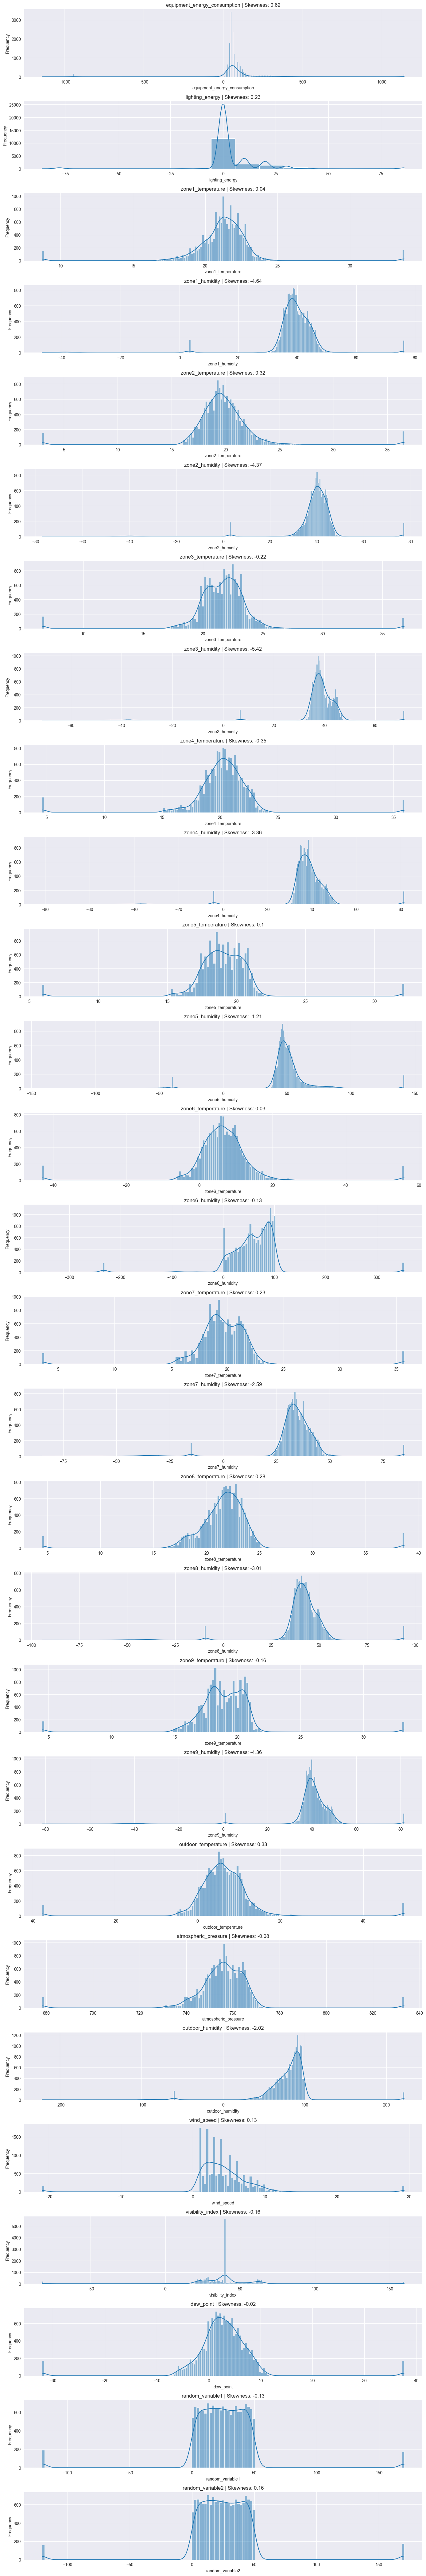

In [517]:
sns.set_style("darkgrid")

# Select numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Create subplots for histograms
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, idx)  # Use 1 column for better readability
    sns.histplot(data[feature], kde=True)  # Add KDE for better visualization
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Note : There are 29 Columns and after excluding "TimeStamp" column we have 28 columns. And from this Graph we can observed that there is 9 Columns which are Right or Left Skewed. <br>So, mostly follows normal that's why we can replace missing values with Mean.

In [518]:
# Exclude the 'timestamp' column from handling missing values
columns_to_fill = data.columns.drop('timestamp', errors='ignore')

# Fill missing values with the mean for numerical columns because our data is skewed (excluding 'timestamp')
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())


# Verify there are no missing values (excluding 'timestamp')
print(data[columns_to_fill].isnull().sum())

equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
hour                            0
dtype: int64


In [519]:
# Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()




Number of duplicate rows: 68


In [520]:
data.shape

(16789, 29)

# 2.Preprocessing

In [521]:
    # Split features and target
X = data.drop(columns=['equipment_energy_consumption'])
y = data['equipment_energy_consumption']

In [522]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

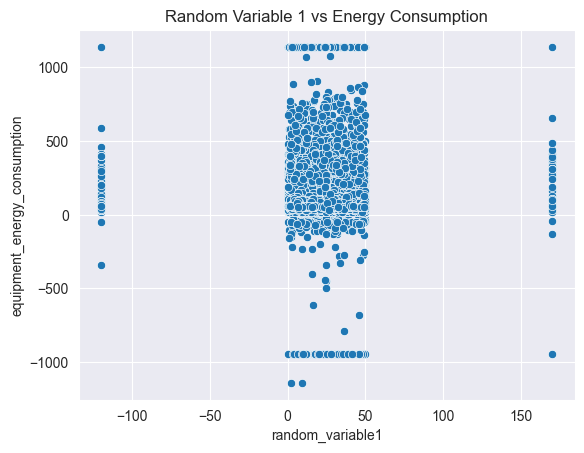

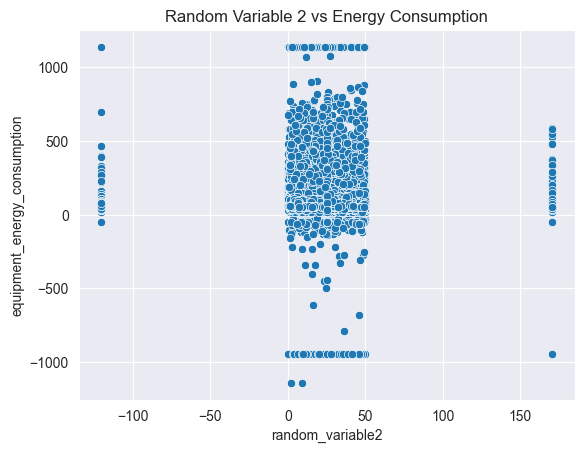

Correlation:
                               random_variable1  random_variable2  \
random_variable1                      1.000000          0.280388   
random_variable2                      0.280388          1.000000   
equipment_energy_consumption         -0.015759         -0.011137   

                              equipment_energy_consumption  
random_variable1                                 -0.015759  
random_variable2                                 -0.011137  
equipment_energy_consumption                      1.000000  


In [523]:
# Analyze random variables
sns.scatterplot(x=data['random_variable1'], y=data['equipment_energy_consumption'])
plt.title('Random Variable 1 vs Energy Consumption')
plt.show()

sns.scatterplot(x=data['random_variable2'], y=data['equipment_energy_consumption'])
plt.title('Random Variable 2 vs Energy Consumption')
plt.show()

# Correlation check
correlation = data[['random_variable1', 'random_variable2', 'equipment_energy_consumption']].corr()
print("Correlation:\n", correlation)

In [524]:

# From above analysis, we can see that 'random_variable1' and 'random_variable2' are not significantly correlated with 'equipment_energy_consumption'
data = data.drop(columns=['random_variable1', 'random_variable2'], errors='ignore')


In [525]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train a random forest regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [526]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data using Linear Regression
lr_predictions = lr_model.predict(X_test)

# Calculate metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R² Score: {lr_r2}")

# Predict on test data using Random Forest Regressor
rf_predictions = rf_model.predict(X_test)

# Calculate metrics for Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R² Score: {rf_r2}")





Linear Regression:
Mean Squared Error: 29700.334817848492
R² Score: 0.01382860634137384

Random Forest Regressor:
Mean Squared Error: 28368.915645274228
R² Score: 0.05803711473072437


In [527]:

# Insights
print("Key Insights:")
print("- Random Forest performs better than Linear Regression.")
print("- Environmental factors like temperature and humidity have a strong correlation with energy consumption.")
print("- Recommendations: Optimize temperature and humidity levels in key zones to reduce energy consumption.")

Key Insights:
- Random Forest performs better than Linear Regression.
- Environmental factors like temperature and humidity have a strong correlation with energy consumption.
- Recommendations: Optimize temperature and humidity levels in key zones to reduce energy consumption.
